In [9]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [10]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [11]:
necoc = 250
generations = int(1500/necoc)
generations

6

In [12]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [13]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [26]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

115


In [29]:
len(number_codes[0])

250

In [30]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49998 stdev: 0.05148
Best fitness: 0.66419 - size: (2, 13) - species 3 - id 109
Average adjusted fitness: 0.156
Mean genetic distance 2.977, standard deviation 0.481
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.388 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52964 stdev: 0.05239
Best fitness: 0.68460 - size: (3, 15) - species 6 - id 357
Average adjusted fitness: 0.163
Mean genetic distance 3.073, standard deviation 0.504
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 6.640 sec (6.514 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54333 stdev: 0.05385
Best fitness: 0.68460 - size: (3, 15) - species 26 - id 357
Average adjusted fitness: 0.135
Mean genetic distance 3.006, standard deviation 0.494
Population of 203 members in 31 species
Total extincti

number of class2:484

 ****** Running generation 0 ****** 

Population's average fitness: 0.44570 stdev: 0.14674
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.200
Mean genetic distance 2.842, standard deviation 0.498
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 5.159 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56398 stdev: 0.13853
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.325
Mean genetic distance 3.012, standard deviation 0.511
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.399 sec (5.279 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60878 stdev: 0.13259
Best fitness: 0.76747 - size: (4, 16) - species 13 - id 481
Average adjusted fitness: 0.315
Mean genetic distance 3.057, standard deviation 0.491
Population of 200 members in 30 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.46891 stdev: 0.09937
Best fitness: 0.70068 - size: (2, 13) - species 6 - id 162
Average adjusted fitness: 0.240
Mean genetic distance 2.913, standard deviation 0.486
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.437 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52956 stdev: 0.10877
Best fitness: 0.77365 - size: (3, 15) - species 1 - id 231
Average adjusted fitness: 0.253
Mean genetic distance 3.025, standard deviation 0.493
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.518 sec (6.978 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56963 stdev: 0.10197
Best fitness: 0.77365 - size: (3, 15) - species 1 - id 231
Average adjusted fitness: 0.279
Mean genetic distance 3.055, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.975 sec (6.977 average)

 ****** Running generation 3 **

number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51378 stdev: 0.08788
Best fitness: 0.81633 - size: (2, 13) - species 1 - id 147
Average adjusted fitness: 0.237
Mean genetic distance 2.972, standard deviation 0.531
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.599 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57203 stdev: 0.09316
Best fitness: 0.82993 - size: (2, 14) - species 1 - id 374
Average adjusted fitness: 0.286
Mean genetic distance 3.051, standard deviation 0.520
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.289 sec (5.944 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58540 stdev: 0.10843
Best fitness: 0.82993 - size: (2, 14) - species 1 - id 374
Average adjusted fitness: 0.323
Mean genetic distance 3.085, standard deviation 0.515
Population of 202 members in 31 species
Total extinctions: 0
Generation time


 ****** Running generation 0 ****** 

Population's average fitness: 0.46675 stdev: 0.15398
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.288
Mean genetic distance 2.899, standard deviation 0.468
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.073 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55557 stdev: 0.15395
Best fitness: 0.80581 - size: (2, 14) - species 2 - id 367
Average adjusted fitness: 0.315
Mean genetic distance 2.987, standard deviation 0.498
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.948 sec (6.510 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58977 stdev: 0.14773
Best fitness: 0.80581 - size: (2, 14) - species 2 - id 367
Average adjusted fitness: 0.287
Mean genetic distance 3.054, standard deviation 0.479
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.908 sec (6.976 ave

Population's average fitness: 0.48771 stdev: 0.10141
Best fitness: 0.73779 - size: (2, 13) - species 2 - id 179
Average adjusted fitness: 0.241
Mean genetic distance 2.955, standard deviation 0.452
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.446 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54780 stdev: 0.10334
Best fitness: 0.78912 - size: (3, 16) - species 19 - id 283
Average adjusted fitness: 0.249
Mean genetic distance 3.061, standard deviation 0.437
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.392 sec (6.419 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56401 stdev: 0.10315
Best fitness: 0.78912 - size: (3, 16) - species 19 - id 283
Average adjusted fitness: 0.224
Mean genetic distance 3.095, standard deviation 0.441
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 6.246 sec (6.361 average)

 ****** Running generation 3 

Population's average fitness: 0.43407 stdev: 0.13683
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.182
Mean genetic distance 2.884, standard deviation 0.471
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.525 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55667 stdev: 0.14486
Best fitness: 0.74830 - size: (2, 14) - species 9 - id 211
Average adjusted fitness: 0.285
Mean genetic distance 2.985, standard deviation 0.487
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.753 sec (5.639 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59718 stdev: 0.13145
Best fitness: 0.74830 - size: (2, 14) - species 9 - id 211
Average adjusted fitness: 0.310
Mean genetic distance 3.016, standard deviation 0.505
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 6.997 sec (6.092 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48617 stdev: 0.09958
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 43
Average adjusted fitness: 0.264
Mean genetic distance 2.935, standard deviation 0.538
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.865 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52652 stdev: 0.10689
Best fitness: 0.72233 - size: (2, 14) - species 8 - id 344
Average adjusted fitness: 0.257
Mean genetic distance 2.991, standard deviation 0.528
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.190 sec (8.027 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57725 stdev: 0.10426
Best fitness: 0.80025 - size: (3, 16) - species 8 - id 537
Average adjusted fitness: 0.248
Mean genetic distance 3.024, standard deviation 0.564
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.218 sec (8.091 average)

 ****** Running generation 3 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.47286 stdev: 0.09802
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 129
Average adjusted fitness: 0.222
Mean genetic distance 2.904, standard deviation 0.476
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.891 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53555 stdev: 0.09561
Best fitness: 0.77737 - size: (3, 14) - species 12 - id 277
Average adjusted fitness: 0.221
Mean genetic distance 2.992, standard deviation 0.461
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.691 sec (8.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56732 stdev: 0.09496
Best fitness: 0.77737 - size: (3, 14) - species 12 - id 277
Average adjusted fitness: 0.272
Mean genetic distance 3.053, standard deviation 0.489
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.616 sec (7.733 

Population's average fitness: 0.50946 stdev: 0.09494
Best fitness: 0.73902 - size: (2, 13) - species 6 - id 198
Average adjusted fitness: 0.249
Mean genetic distance 2.908, standard deviation 0.481
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55949 stdev: 0.09032
Best fitness: 0.74768 - size: (2, 13) - species 12 - id 344
Average adjusted fitness: 0.263
Mean genetic distance 2.961, standard deviation 0.474
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.351 sec (5.355 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58239 stdev: 0.09375
Best fitness: 0.74768 - size: (2, 13) - species 5 - id 344
Average adjusted fitness: 0.212
Mean genetic distance 2.948, standard deviation 0.480
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.620 sec (5.443 average)

 ****** Running generation 3 *

Generation time: 6.335 sec (6.158 average)
number of class1:490
number of class2:1127

 ****** Running generation 0 ****** 

Population's average fitness: 0.55903 stdev: 0.13286
Best fitness: 0.77180 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.241
Mean genetic distance 2.897, standard deviation 0.478
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.956 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61362 stdev: 0.12311
Best fitness: 0.77180 - size: (2, 13) - species 5 - id 62
Average adjusted fitness: 0.371
Mean genetic distance 3.024, standard deviation 0.475
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 5.227 sec (5.092 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62613 stdev: 0.11307
Best fitness: 0.77180 - size: (2, 13) - species 23 - id 62
Average adjusted fitness: 0.312
Mean genetic distance 3.074, standard deviation 0.488
Population of


 ****** Running generation 0 ****** 

Population's average fitness: 0.48522 stdev: 0.08287
Best fitness: 0.70130 - size: (2, 13) - species 2 - id 185
Average adjusted fitness: 0.211
Mean genetic distance 2.869, standard deviation 0.486
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.853 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52346 stdev: 0.08482
Best fitness: 0.70934 - size: (3, 13) - species 2 - id 385
Average adjusted fitness: 0.170
Mean genetic distance 3.003, standard deviation 0.496
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.676 sec (5.764 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54824 stdev: 0.08114
Best fitness: 0.70934 - size: (3, 13) - species 3 - id 385
Average adjusted fitness: 0.198
Mean genetic distance 3.085, standard deviation 0.492
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.789 sec (6.106 av


 ****** Running generation 0 ****** 

Population's average fitness: 0.50093 stdev: 0.05708
Best fitness: 0.68398 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.175
Mean genetic distance 2.873, standard deviation 0.436
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.178 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53201 stdev: 0.07622
Best fitness: 0.76067 - size: (3, 15) - species 10 - id 320
Average adjusted fitness: 0.212
Mean genetic distance 2.950, standard deviation 0.452
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.411 sec (5.295 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55730 stdev: 0.07672
Best fitness: 0.76067 - size: (3, 15) - species 10 - id 320
Average adjusted fitness: 0.236
Mean genetic distance 2.964, standard deviation 0.463
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 5.675 sec (5.422 

Population's average fitness: 0.55710 stdev: 0.21140
Best fitness: 0.83673 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.495
Mean genetic distance 2.984, standard deviation 0.494
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67070 stdev: 0.16866
Best fitness: 0.86642 - size: (3, 13) - species 6 - id 290
Average adjusted fitness: 0.463
Mean genetic distance 3.110, standard deviation 0.486
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 5.637 sec (5.972 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72144 stdev: 0.14765
Best fitness: 0.86642 - size: (3, 13) - species 6 - id 290
Average adjusted fitness: 0.499
Mean genetic distance 3.134, standard deviation 0.495
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 5.741 sec (5.895 average)

 ****** Running generation 3 ***

number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.47973 stdev: 0.10179
Best fitness: 0.74830 - size: (2, 13) - species 3 - id 167
Average adjusted fitness: 0.264
Mean genetic distance 2.920, standard deviation 0.509
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.314 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54229 stdev: 0.10854
Best fitness: 0.75015 - size: (2, 14) - species 4 - id 241
Average adjusted fitness: 0.232
Mean genetic distance 2.969, standard deviation 0.507
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.486 sec (5.400 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58493 stdev: 0.10407
Best fitness: 0.79654 - size: (4, 16) - species 1 - id 514
Average adjusted fitness: 0.253
Mean genetic distance 3.003, standard deviation 0.486
Population of 205 members in 31 species
Total extinctio

Population's average fitness: 0.47096 stdev: 0.14424
Best fitness: 0.79530 - size: (2, 13) - species 2 - id 168
Average adjusted fitness: 0.221
Mean genetic distance 2.938, standard deviation 0.460
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.334 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58237 stdev: 0.14566
Best fitness: 0.83117 - size: (3, 15) - species 1 - id 286
Average adjusted fitness: 0.312
Mean genetic distance 3.031, standard deviation 0.464
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.259 sec (5.796 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61466 stdev: 0.14392
Best fitness: 0.83364 - size: (4, 16) - species 1 - id 520
Average adjusted fitness: 0.292
Mean genetic distance 3.038, standard deviation 0.468
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.615 sec (6.403 average)

 ****** Running generation 3 **

Population's average fitness: 0.45787 stdev: 0.14215
Best fitness: 0.78850 - size: (2, 13) - species 1 - id 72
Average adjusted fitness: 0.239
Mean genetic distance 2.929, standard deviation 0.472
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.485 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55312 stdev: 0.14217
Best fitness: 0.78850 - size: (2, 13) - species 1 - id 72
Average adjusted fitness: 0.284
Mean genetic distance 3.036, standard deviation 0.491
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.683 sec (6.084 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58565 stdev: 0.13818
Best fitness: 0.78850 - size: (2, 13) - species 14 - id 72
Average adjusted fitness: 0.301
Mean genetic distance 3.083, standard deviation 0.497
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.078 sec (6.749 average)

 ****** Running generation 3 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49515 stdev: 0.07377
Best fitness: 0.75510 - size: (2, 13) - species 2 - id 121
Average adjusted fitness: 0.251
Mean genetic distance 2.908, standard deviation 0.471
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.153 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54408 stdev: 0.08427
Best fitness: 0.79035 - size: (2, 13) - species 5 - id 331
Average adjusted fitness: 0.241
Mean genetic distance 2.977, standard deviation 0.477
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.793 sec (5.473 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56482 stdev: 0.09204
Best fitness: 0.79344 - size: (2, 14) - species 4 - id 536
Average adjusted fitness: 0.220
Mean genetic distance 3.003, standard deviation 0.504
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.724 sec (6.224 av

Population's average fitness: 0.47692 stdev: 0.10642
Best fitness: 0.73346 - size: (2, 13) - species 4 - id 126
Average adjusted fitness: 0.254
Mean genetic distance 2.854, standard deviation 0.446
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.484 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54843 stdev: 0.10512
Best fitness: 0.74273 - size: (3, 13) - species 9 - id 279
Average adjusted fitness: 0.245
Mean genetic distance 2.975, standard deviation 0.484
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.722 sec (5.603 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56641 stdev: 0.11305
Best fitness: 0.79654 - size: (3, 14) - species 27 - id 528
Average adjusted fitness: 0.295
Mean genetic distance 3.021, standard deviation 0.511
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.138 sec (5.781 average)

 ****** Running generation 3 *

Population's average fitness: 0.50113 stdev: 0.08620
Best fitness: 0.71614 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.216
Mean genetic distance 3.000, standard deviation 0.509
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.523 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55062 stdev: 0.08690
Best fitness: 0.75819 - size: (2, 13) - species 16 - id 292
Average adjusted fitness: 0.300
Mean genetic distance 3.062, standard deviation 0.501
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.913 sec (5.718 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56696 stdev: 0.09239
Best fitness: 0.76623 - size: (4, 17) - species 2 - id 469
Average adjusted fitness: 0.313
Mean genetic distance 3.078, standard deviation 0.474
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.238 sec (5.891 average)

 ****** Running generation 3 *

number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.46808 stdev: 0.14811
Best fitness: 0.73531 - size: (2, 13) - species 5 - id 62
Average adjusted fitness: 0.218
Mean genetic distance 3.003, standard deviation 0.503
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.476 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56086 stdev: 0.14009
Best fitness: 0.74150 - size: (3, 15) - species 7 - id 361
Average adjusted fitness: 0.265
Mean genetic distance 3.039, standard deviation 0.495
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.722 sec (5.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59294 stdev: 0.13910
Best fitness: 0.75634 - size: (3, 16) - species 19 - id 486
Average adjusted fitness: 0.289
Mean genetic distance 3.054, standard deviation 0.495
Population of 202 members in 33 species
Total extinctions: 0
Generation time


 ****** Running generation 0 ****** 

Population's average fitness: 0.46891 stdev: 0.14599
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.212
Mean genetic distance 2.937, standard deviation 0.518
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.625 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54933 stdev: 0.14498
Best fitness: 0.73222 - size: (2, 14) - species 3 - id 349
Average adjusted fitness: 0.314
Mean genetic distance 3.082, standard deviation 0.519
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 19.354 sec (18.990 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58657 stdev: 0.13017
Best fitness: 0.73222 - size: (2, 14) - species 8 - id 349
Average adjusted fitness: 0.281
Mean genetic distance 3.141, standard deviation 0.512
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 20.274 sec (19.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47857 stdev: 0.09410
Best fitness: 0.72233 - size: (2, 13) - species 1 - id 196
Average adjusted fitness: 0.174
Mean genetic distance 2.816, standard deviation 0.460
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 26.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53817 stdev: 0.09766
Best fitness: 0.72665 - size: (3, 15) - species 6 - id 386
Average adjusted fitness: 0.238
Mean genetic distance 2.914, standard deviation 0.484
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 28.746 sec (27.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54967 stdev: 0.09500
Best fitness: 0.75510 - size: (3, 13) - species 1 - id 479
Average adjusted fitness: 0.233
Mean genetic distance 2.948, standard deviation 0.478
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 29.468 sec (28.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48013 stdev: 0.08979
Best fitness: 0.67656 - size: (2, 13) - species 7 - id 94
Average adjusted fitness: 0.196
Mean genetic distance 2.917, standard deviation 0.496
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 26.928 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54201 stdev: 0.09635
Best fitness: 0.72975 - size: (3, 14) - species 7 - id 381
Average adjusted fitness: 0.283
Mean genetic distance 2.994, standard deviation 0.504
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 28.425 sec (27.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56691 stdev: 0.10066
Best fitness: 0.78850 - size: (4, 17) - species 25 - id 500
Average adjusted fitness: 0.236
Mean genetic distance 3.043, standard deviation 0.483
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 29.340 sec (28.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.52449 stdev: 0.08857
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.226
Mean genetic distance 2.930, standard deviation 0.496
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 26.325 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55865 stdev: 0.09020
Best fitness: 0.72171 - size: (2, 13) - species 4 - id 10
Average adjusted fitness: 0.256
Mean genetic distance 3.004, standard deviation 0.459
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 28.715 sec (27.520 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58512 stdev: 0.08375
Best fitness: 0.72975 - size: (3, 14) - species 3 - id 527
Average adjusted fitness: 0.274
Mean genetic distance 3.001, standard deviation 0.486
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 29.499 sec (28.180


 ****** Running generation 0 ****** 

Population's average fitness: 0.49105 stdev: 0.10084
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.199
Mean genetic distance 2.922, standard deviation 0.452
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 27.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55137 stdev: 0.10138
Best fitness: 0.77180 - size: (2, 13) - species 5 - id 253
Average adjusted fitness: 0.230
Mean genetic distance 3.004, standard deviation 0.457
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 33.037 sec (30.472 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56462 stdev: 0.10362
Best fitness: 0.77489 - size: (4, 16) - species 5 - id 524
Average adjusted fitness: 0.225
Mean genetic distance 3.002, standard deviation 0.462
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 31.764 sec (30.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.50551 stdev: 0.05492
Best fitness: 0.67285 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.190
Mean genetic distance 2.806, standard deviation 0.442
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.050 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53421 stdev: 0.06289
Best fitness: 0.71181 - size: (3, 15) - species 17 - id 369
Average adjusted fitness: 0.181
Mean genetic distance 2.845, standard deviation 0.477
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 22.093 sec (21.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54988 stdev: 0.07131
Best fitness: 0.73531 - size: (4, 17) - species 9 - id 533
Average adjusted fitness: 0.219
Mean genetic distance 2.854, standard deviation 0.475
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 22.973 sec (22.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.51840 stdev: 0.07958
Best fitness: 0.69017 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.210
Mean genetic distance 2.873, standard deviation 0.464
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 21.839 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57041 stdev: 0.06524
Best fitness: 0.69017 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.170
Mean genetic distance 2.952, standard deviation 0.499
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.171 sec (22.005 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57125 stdev: 0.06620
Best fitness: 0.69017 - size: (2, 13) - species 9 - id 7
Average adjusted fitness: 0.173
Mean genetic distance 3.021, standard deviation 0.491
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 23.252 sec (22.421 ave


 ****** Running generation 0 ****** 

Population's average fitness: 0.49699 stdev: 0.05535
Best fitness: 0.72171 - size: (2, 13) - species 3 - id 30
Average adjusted fitness: 0.167
Mean genetic distance 2.911, standard deviation 0.446
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 20.595 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52451 stdev: 0.05568
Best fitness: 0.72171 - size: (2, 13) - species 7 - id 30
Average adjusted fitness: 0.157
Mean genetic distance 3.036, standard deviation 0.473
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.804 sec (21.199 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53529 stdev: 0.06096
Best fitness: 0.72171 - size: (2, 13) - species 24 - id 30
Average adjusted fitness: 0.152
Mean genetic distance 3.094, standard deviation 0.487
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 24.947 sec (22.449


 ****** Running generation 0 ****** 

Population's average fitness: 0.46254 stdev: 0.15085
Best fitness: 0.75325 - size: (2, 13) - species 2 - id 139
Average adjusted fitness: 0.227
Mean genetic distance 2.814, standard deviation 0.453
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 20.568 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56169 stdev: 0.15517
Best fitness: 0.79406 - size: (2, 14) - species 6 - id 252
Average adjusted fitness: 0.268
Mean genetic distance 2.994, standard deviation 0.510
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.798 sec (21.183 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58313 stdev: 0.15563
Best fitness: 0.80767 - size: (2, 15) - species 6 - id 550
Average adjusted fitness: 0.324
Mean genetic distance 3.080, standard deviation 0.516
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.005 sec (21.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49400 stdev: 0.06092
Best fitness: 0.69388 - size: (2, 13) - species 5 - id 19
Average adjusted fitness: 0.206
Mean genetic distance 2.897, standard deviation 0.473
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 20.452 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52205 stdev: 0.06186
Best fitness: 0.73531 - size: (2, 13) - species 5 - id 360
Average adjusted fitness: 0.160
Mean genetic distance 2.964, standard deviation 0.477
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 21.787 sec (21.119 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54005 stdev: 0.07050
Best fitness: 0.73531 - size: (2, 13) - species 5 - id 360
Average adjusted fitness: 0.220
Mean genetic distance 2.937, standard deviation 0.462
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.513 sec (21.58


 ****** Running generation 0 ****** 

Population's average fitness: 0.53315 stdev: 0.07875
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 119
Average adjusted fitness: 0.205
Mean genetic distance 2.798, standard deviation 0.454
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 20.669 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55901 stdev: 0.07882
Best fitness: 0.68522 - size: (2, 13) - species 7 - id 119
Average adjusted fitness: 0.214
Mean genetic distance 2.843, standard deviation 0.484
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 21.768 sec (21.219 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57791 stdev: 0.07674
Best fitness: 0.69017 - size: (4, 16) - species 9 - id 491
Average adjusted fitness: 0.205
Mean genetic distance 2.899, standard deviation 0.512
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 22.624 sec (21.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.46778 stdev: 0.21651
Best fitness: 0.83179 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.288
Mean genetic distance 2.869, standard deviation 0.496
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 20.583 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60191 stdev: 0.20312
Best fitness: 0.83179 - size: (2, 13) - species 9 - id 138
Average adjusted fitness: 0.388
Mean genetic distance 2.963, standard deviation 0.513
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 22.272 sec (21.428 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63195 stdev: 0.19706
Best fitness: 0.83179 - size: (2, 13) - species 9 - id 138
Average adjusted fitness: 0.421
Mean genetic distance 3.003, standard deviation 0.508
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 22.895 sec (21.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.49840 stdev: 0.07270
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.184
Mean genetic distance 2.888, standard deviation 0.461
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.686 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53825 stdev: 0.07525
Best fitness: 0.75572 - size: (2, 13) - species 5 - id 314
Average adjusted fitness: 0.208
Mean genetic distance 2.982, standard deviation 0.478
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.786 sec (21.236 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56296 stdev: 0.09491
Best fitness: 0.78973 - size: (3, 15) - species 19 - id 524
Average adjusted fitness: 0.305
Mean genetic distance 3.025, standard deviation 0.511
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 22.873 sec (21.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.49174 stdev: 0.06645
Best fitness: 0.68089 - size: (2, 13) - species 2 - id 73
Average adjusted fitness: 0.199
Mean genetic distance 2.885, standard deviation 0.467
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 21.776 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52963 stdev: 0.06242
Best fitness: 0.73840 - size: (3, 15) - species 4 - id 292
Average adjusted fitness: 0.140
Mean genetic distance 3.007, standard deviation 0.464
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 22.707 sec (22.242 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54761 stdev: 0.07172
Best fitness: 0.73840 - size: (3, 15) - species 18 - id 292
Average adjusted fitness: 0.166
Mean genetic distance 3.053, standard deviation 0.458
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 23.151 sec (22.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47563 stdev: 0.15392
Best fitness: 0.74212 - size: (2, 13) - species 4 - id 91
Average adjusted fitness: 0.214
Mean genetic distance 2.870, standard deviation 0.465
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 20.698 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54068 stdev: 0.14329
Best fitness: 0.74212 - size: (2, 13) - species 4 - id 91
Average adjusted fitness: 0.323
Mean genetic distance 2.999, standard deviation 0.469
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 21.646 sec (21.172 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58511 stdev: 0.13544
Best fitness: 0.75758 - size: (4, 17) - species 14 - id 517
Average adjusted fitness: 0.298
Mean genetic distance 3.029, standard deviation 0.473
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 24.421 sec (22.25


 ****** Running generation 0 ****** 

Population's average fitness: 0.53748 stdev: 0.13890
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.258
Mean genetic distance 2.911, standard deviation 0.441
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 20.446 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61191 stdev: 0.12568
Best fitness: 0.74644 - size: (3, 14) - species 20 - id 369
Average adjusted fitness: 0.315
Mean genetic distance 2.980, standard deviation 0.449
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 21.782 sec (21.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62781 stdev: 0.12503
Best fitness: 0.74644 - size: (3, 14) - species 1 - id 369
Average adjusted fitness: 0.347
Mean genetic distance 3.019, standard deviation 0.458
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 23.105 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46404 stdev: 0.15320
Best fitness: 0.78602 - size: (2, 13) - species 5 - id 79
Average adjusted fitness: 0.274
Mean genetic distance 2.897, standard deviation 0.463
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 20.435 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56283 stdev: 0.15356
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.357
Mean genetic distance 2.994, standard deviation 0.538
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.276 sec (21.356 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59915 stdev: 0.14705
Best fitness: 0.79839 - size: (3, 16) - species 30 - id 466
Average adjusted fitness: 0.410
Mean genetic distance 3.044, standard deviation 0.550
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 22.968 sec (21.89


 ****** Running generation 0 ****** 

Population's average fitness: 0.47699 stdev: 0.07776
Best fitness: 0.69264 - size: (2, 13) - species 2 - id 126
Average adjusted fitness: 0.107
Mean genetic distance 2.882, standard deviation 0.456
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 21.261 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52006 stdev: 0.08693
Best fitness: 0.70130 - size: (3, 15) - species 5 - id 381
Average adjusted fitness: 0.192
Mean genetic distance 2.904, standard deviation 0.458
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 23.004 sec (22.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53786 stdev: 0.08255
Best fitness: 0.71614 - size: (3, 15) - species 1 - id 540
Average adjusted fitness: 0.191
Mean genetic distance 2.915, standard deviation 0.443
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 23.267 sec (22.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.52400 stdev: 0.08895
Best fitness: 0.73964 - size: (2, 13) - species 8 - id 152
Average adjusted fitness: 0.198
Mean genetic distance 2.889, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.723 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56290 stdev: 0.08997
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 152
Average adjusted fitness: 0.230
Mean genetic distance 2.995, standard deviation 0.491
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.164 sec (21.443 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58330 stdev: 0.09583
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 152
Average adjusted fitness: 0.270
Mean genetic distance 3.034, standard deviation 0.501
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 23.352 sec (22.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47699 stdev: 0.15428
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 99
Average adjusted fitness: 0.203
Mean genetic distance 2.910, standard deviation 0.496
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.673 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54465 stdev: 0.15573
Best fitness: 0.75077 - size: (2, 13) - species 5 - id 99
Average adjusted fitness: 0.321
Mean genetic distance 2.996, standard deviation 0.496
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 22.062 sec (21.368 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59137 stdev: 0.13391
Best fitness: 0.75077 - size: (2, 13) - species 22 - id 99
Average adjusted fitness: 0.285
Mean genetic distance 3.048, standard deviation 0.491
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 22.882 sec (21.872


 ****** Running generation 0 ****** 

Population's average fitness: 0.56390 stdev: 0.20940
Best fitness: 0.83673 - size: (2, 13) - species 6 - id 58
Average adjusted fitness: 0.346
Mean genetic distance 2.880, standard deviation 0.451
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 20.918 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69081 stdev: 0.16423
Best fitness: 0.87013 - size: (2, 14) - species 3 - id 317
Average adjusted fitness: 0.473
Mean genetic distance 2.927, standard deviation 0.443
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.309 sec (21.614 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72081 stdev: 0.14432
Best fitness: 0.87755 - size: (3, 15) - species 3 - id 541
Average adjusted fitness: 0.513
Mean genetic distance 2.975, standard deviation 0.481
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.663 sec (22.29


 ****** Running generation 0 ****** 

Population's average fitness: 0.47288 stdev: 0.09020
Best fitness: 0.76438 - size: (2, 13) - species 1 - id 82
Average adjusted fitness: 0.208
Mean genetic distance 2.898, standard deviation 0.462
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.317 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54024 stdev: 0.10032
Best fitness: 0.80210 - size: (2, 13) - species 19 - id 363
Average adjusted fitness: 0.224
Mean genetic distance 2.930, standard deviation 0.479
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 22.160 sec (21.738 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57043 stdev: 0.09813
Best fitness: 0.80210 - size: (2, 13) - species 19 - id 363
Average adjusted fitness: 0.204
Mean genetic distance 2.960, standard deviation 0.478
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 22.360 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46194 stdev: 0.14861
Best fitness: 0.72109 - size: (2, 13) - species 2 - id 40
Average adjusted fitness: 0.276
Mean genetic distance 2.920, standard deviation 0.480
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55319 stdev: 0.14994
Best fitness: 0.77551 - size: (3, 14) - species 5 - id 214
Average adjusted fitness: 0.296
Mean genetic distance 2.945, standard deviation 0.453
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 22.271 sec (21.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59351 stdev: 0.14373
Best fitness: 0.77551 - size: (3, 14) - species 3 - id 214
Average adjusted fitness: 0.335
Mean genetic distance 3.005, standard deviation 0.463
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 24.032 sec (22.34


 ****** Running generation 0 ****** 

Population's average fitness: 0.48254 stdev: 0.09256
Best fitness: 0.67161 - size: (2, 13) - species 7 - id 156
Average adjusted fitness: 0.235
Mean genetic distance 2.960, standard deviation 0.486
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 20.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52999 stdev: 0.08683
Best fitness: 0.68646 - size: (3, 15) - species 1 - id 336
Average adjusted fitness: 0.246
Mean genetic distance 2.996, standard deviation 0.486
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.633 sec (21.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54620 stdev: 0.08846
Best fitness: 0.71985 - size: (2, 12) - species 31 - id 494
Average adjusted fitness: 0.278
Mean genetic distance 2.948, standard deviation 0.459
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 22.835 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45983 stdev: 0.15846
Best fitness: 0.78355 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.294
Mean genetic distance 2.808, standard deviation 0.457
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 20.451 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55595 stdev: 0.15384
Best fitness: 0.81323 - size: (3, 14) - species 8 - id 254
Average adjusted fitness: 0.335
Mean genetic distance 2.926, standard deviation 0.507
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 22.252 sec (21.351 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59295 stdev: 0.15869
Best fitness: 0.83983 - size: (4, 16) - species 19 - id 444
Average adjusted fitness: 0.416
Mean genetic distance 2.976, standard deviation 0.500
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 22.823 sec (21.84


 ****** Running generation 0 ****** 

Population's average fitness: 0.44725 stdev: 0.20984
Best fitness: 0.80087 - size: (2, 13) - species 2 - id 23
Average adjusted fitness: 0.241
Mean genetic distance 2.922, standard deviation 0.451
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 20.585 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59709 stdev: 0.20595
Best fitness: 0.80210 - size: (3, 14) - species 9 - id 242
Average adjusted fitness: 0.367
Mean genetic distance 3.024, standard deviation 0.483
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 22.024 sec (21.305 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65054 stdev: 0.19017
Best fitness: 0.81633 - size: (3, 15) - species 9 - id 536
Average adjusted fitness: 0.434
Mean genetic distance 3.047, standard deviation 0.486
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 23.401 sec (22.00


 ****** Running generation 0 ****** 

Population's average fitness: 0.48401 stdev: 0.07673
Best fitness: 0.64131 - size: (2, 13) - species 1 - id 49
Average adjusted fitness: 0.151
Mean genetic distance 2.899, standard deviation 0.447
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.260 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52848 stdev: 0.07763
Best fitness: 0.66110 - size: (3, 15) - species 3 - id 286
Average adjusted fitness: 0.164
Mean genetic distance 2.991, standard deviation 0.473
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.020 sec (21.640 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55603 stdev: 0.06897
Best fitness: 0.66110 - size: (3, 15) - species 3 - id 286
Average adjusted fitness: 0.160
Mean genetic distance 3.059, standard deviation 0.481
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.044 sec (22.10


 ****** Running generation 0 ****** 

Population's average fitness: 0.50119 stdev: 0.04521
Best fitness: 0.63822 - size: (2, 13) - species 1 - id 47
Average adjusted fitness: 0.186
Mean genetic distance 2.942, standard deviation 0.496
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.777 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51876 stdev: 0.05055
Best fitness: 0.63822 - size: (2, 13) - species 4 - id 47
Average adjusted fitness: 0.127
Mean genetic distance 3.038, standard deviation 0.481
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.272 sec (21.524 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53034 stdev: 0.05780
Best fitness: 0.66481 - size: (3, 16) - species 32 - id 484
Average adjusted fitness: 0.194
Mean genetic distance 3.037, standard deviation 0.493
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 23.002 sec (22.01


 ****** Running generation 0 ****** 

Population's average fitness: 0.46868 stdev: 0.07991
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 119
Average adjusted fitness: 0.195
Mean genetic distance 2.869, standard deviation 0.457
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.584 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52530 stdev: 0.08796
Best fitness: 0.67965 - size: (3, 15) - species 18 - id 341
Average adjusted fitness: 0.219
Mean genetic distance 2.918, standard deviation 0.493
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 22.030 sec (21.307 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56342 stdev: 0.08432
Best fitness: 0.72294 - size: (3, 14) - species 19 - id 502
Average adjusted fitness: 0.250
Mean genetic distance 3.014, standard deviation 0.508
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 22.952 sec (21


 ****** Running generation 0 ****** 

Population's average fitness: 0.50966 stdev: 0.06993
Best fitness: 0.73531 - size: (2, 13) - species 1 - id 188
Average adjusted fitness: 0.180
Mean genetic distance 2.895, standard deviation 0.473
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 23.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53877 stdev: 0.07347
Best fitness: 0.73840 - size: (3, 15) - species 17 - id 316
Average adjusted fitness: 0.180
Mean genetic distance 3.001, standard deviation 0.503
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 22.612 sec (23.182 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54908 stdev: 0.07856
Best fitness: 0.74706 - size: (3, 14) - species 17 - id 513
Average adjusted fitness: 0.212
Mean genetic distance 3.085, standard deviation 0.507
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 23.408 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.49366 stdev: 0.07189
Best fitness: 0.74026 - size: (2, 13) - species 4 - id 162
Average adjusted fitness: 0.227
Mean genetic distance 2.939, standard deviation 0.478
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 20.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54345 stdev: 0.06984
Best fitness: 0.74026 - size: (2, 13) - species 7 - id 162
Average adjusted fitness: 0.144
Mean genetic distance 3.035, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 22.358 sec (21.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56091 stdev: 0.07206
Best fitness: 0.74026 - size: (2, 13) - species 7 - id 162
Average adjusted fitness: 0.171
Mean genetic distance 3.023, standard deviation 0.505
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 24.266 sec (22.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.50639 stdev: 0.07505
Best fitness: 0.74212 - size: (2, 13) - species 5 - id 176
Average adjusted fitness: 0.187
Mean genetic distance 2.959, standard deviation 0.508
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 20.634 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54651 stdev: 0.07045
Best fitness: 0.76994 - size: (2, 13) - species 24 - id 364
Average adjusted fitness: 0.180
Mean genetic distance 3.021, standard deviation 0.514
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 22.279 sec (21.457 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54771 stdev: 0.08759
Best fitness: 0.76994 - size: (2, 13) - species 24 - id 364
Average adjusted fitness: 0.313
Mean genetic distance 3.002, standard deviation 0.519
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 23.089 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.45894 stdev: 0.21012
Best fitness: 0.80581 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.258
Mean genetic distance 2.803, standard deviation 0.447
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 20.792 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57914 stdev: 0.20263
Best fitness: 0.81756 - size: (3, 14) - species 13 - id 339
Average adjusted fitness: 0.369
Mean genetic distance 2.841, standard deviation 0.452
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.775 sec (21.284 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64005 stdev: 0.19242
Best fitness: 0.81756 - size: (3, 14) - species 13 - id 339
Average adjusted fitness: 0.423
Mean genetic distance 2.855, standard deviation 0.447
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 23.080 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47617 stdev: 0.08936
Best fitness: 0.69388 - size: (2, 13) - species 5 - id 102
Average adjusted fitness: 0.186
Mean genetic distance 2.773, standard deviation 0.423
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.532 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54372 stdev: 0.08710
Best fitness: 0.75634 - size: (3, 14) - species 8 - id 212
Average adjusted fitness: 0.209
Mean genetic distance 2.897, standard deviation 0.451
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.903 sec (21.217 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56559 stdev: 0.08470
Best fitness: 0.75634 - size: (3, 14) - species 8 - id 212
Average adjusted fitness: 0.250
Mean genetic distance 3.001, standard deviation 0.478
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 22.842 sec (21.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.51999 stdev: 0.08849
Best fitness: 0.66729 - size: (2, 13) - species 5 - id 114
Average adjusted fitness: 0.191
Mean genetic distance 2.796, standard deviation 0.460
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 20.829 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56635 stdev: 0.08225
Best fitness: 0.70686 - size: (2, 14) - species 2 - id 256
Average adjusted fitness: 0.248
Mean genetic distance 2.941, standard deviation 0.499
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.265 sec (21.547 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57200 stdev: 0.09140
Best fitness: 0.73160 - size: (2, 15) - species 8 - id 433
Average adjusted fitness: 0.241
Mean genetic distance 3.043, standard deviation 0.497
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 22.536 sec (21.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.52208 stdev: 0.08977
Best fitness: 0.67471 - size: (2, 13) - species 6 - id 58
Average adjusted fitness: 0.227
Mean genetic distance 2.971, standard deviation 0.500
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 20.885 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56127 stdev: 0.08505
Best fitness: 0.72480 - size: (3, 15) - species 2 - id 222
Average adjusted fitness: 0.252
Mean genetic distance 3.053, standard deviation 0.486
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.369 sec (21.627 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56840 stdev: 0.08507
Best fitness: 0.72480 - size: (3, 15) - species 2 - id 222
Average adjusted fitness: 0.186
Mean genetic distance 3.102, standard deviation 0.459
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 22.913 sec (22.05


 ****** Running generation 0 ****** 

Population's average fitness: 0.47128 stdev: 0.14582
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 179
Average adjusted fitness: 0.215
Mean genetic distance 2.890, standard deviation 0.469
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 20.409 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56053 stdev: 0.14679
Best fitness: 0.76067 - size: (3, 14) - species 13 - id 283
Average adjusted fitness: 0.300
Mean genetic distance 3.008, standard deviation 0.452
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.191 sec (20.800 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58777 stdev: 0.13970
Best fitness: 0.77427 - size: (3, 15) - species 5 - id 501
Average adjusted fitness: 0.279
Mean genetic distance 3.044, standard deviation 0.461
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.494 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47690 stdev: 0.08985
Best fitness: 0.68707 - size: (2, 13) - species 7 - id 35
Average adjusted fitness: 0.164
Mean genetic distance 2.905, standard deviation 0.519
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54531 stdev: 0.08414
Best fitness: 0.68707 - size: (2, 13) - species 7 - id 35
Average adjusted fitness: 0.195
Mean genetic distance 3.001, standard deviation 0.494
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 16.797 sec (16.284 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55580 stdev: 0.08850
Best fitness: 0.68707 - size: (2, 13) - species 22 - id 35
Average adjusted fitness: 0.224
Mean genetic distance 3.060, standard deviation 0.468
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 17.765 sec (16.778


 ****** Running generation 0 ****** 

Population's average fitness: 0.51908 stdev: 0.09940
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.220
Mean genetic distance 2.857, standard deviation 0.441
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 14.892 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56881 stdev: 0.11080
Best fitness: 0.76685 - size: (3, 15) - species 9 - id 255
Average adjusted fitness: 0.278
Mean genetic distance 2.970, standard deviation 0.472
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.255 sec (15.073 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60093 stdev: 0.10553
Best fitness: 0.79777 - size: (3, 15) - species 7 - id 502
Average adjusted fitness: 0.268
Mean genetic distance 2.992, standard deviation 0.467
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 15.720 sec (15.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.55519 stdev: 0.13387
Best fitness: 0.76562 - size: (2, 13) - species 2 - id 58
Average adjusted fitness: 0.281
Mean genetic distance 2.902, standard deviation 0.482
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 10.130 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60400 stdev: 0.13533
Best fitness: 0.79159 - size: (3, 15) - species 2 - id 365
Average adjusted fitness: 0.329
Mean genetic distance 3.028, standard deviation 0.491
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.704 sec (9.917 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64392 stdev: 0.11343
Best fitness: 0.79159 - size: (3, 15) - species 5 - id 365
Average adjusted fitness: 0.318
Mean genetic distance 3.116, standard deviation 0.519
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 10.438 sec (10.091 

Population's average fitness: 0.44136 stdev: 0.14145
Best fitness: 0.75325 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.238
Mean genetic distance 2.945, standard deviation 0.504
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.391 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57089 stdev: 0.13466
Best fitness: 0.77056 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.281
Mean genetic distance 2.977, standard deviation 0.512
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.911 sec (9.651 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60220 stdev: 0.12103
Best fitness: 0.77056 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.296
Mean genetic distance 3.012, standard deviation 0.490
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 9.983 sec (9.762 average)

 ****** Running generation 3 **

Population's average fitness: 0.49485 stdev: 0.05487
Best fitness: 0.67594 - size: (2, 13) - species 6 - id 184
Average adjusted fitness: 0.198
Mean genetic distance 2.994, standard deviation 0.497
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.937 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52732 stdev: 0.06767
Best fitness: 0.71800 - size: (3, 15) - species 5 - id 381
Average adjusted fitness: 0.204
Mean genetic distance 3.010, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.525 sec (9.231 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54389 stdev: 0.08017
Best fitness: 0.74954 - size: (4, 17) - species 8 - id 505
Average adjusted fitness: 0.208
Mean genetic distance 3.067, standard deviation 0.480
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 10.314 sec (9.592 average)

 ****** Running generation 3 *

In [24]:
len(winner_list)

4

In [21]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [22]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [31]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8555555555555555

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[12  1  0  0  0  0  0  0  4  1]
 [ 4  8  0  0  2  0  1  0  4  0]
 [ 0  0 14  2  0  0  1  4  0  0]
 [ 0  1  1  4  0  0  0  0  0  0]
 [ 0  5  1  0 15  0  0  2  3  0]
 [ 0  1  0  8  0 12  0  0  1  1]
 [ 0  1  0  1  0  0 16  0  2  1]
 [ 0  1  1  0  1  0  0 11  1  0]
 [ 0  0  0  3  2  0  0  2  2  0]
 [ 0  1  0  0  0  6  0  0  0 15]]


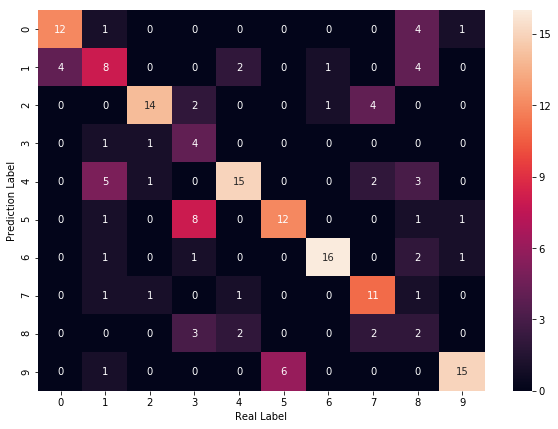

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [19]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[9] real:5
#1 min_error:1 index:[2 4 6 7] real:2
#2 min_error:1 index:[1 4 6] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 4 6] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[2 4 6 7] real:1
#10 min_error:0 index:[2] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:1 index:[2 4 6 7] real:6
#13 min_error:0 index:[6] real:3
#14 min_error:1 index:[1 4 6] real:1
#15 min_error:0 index:[5] real:3
#16 min_error:0 index:[9] real:9
#17 min_error:1 index:[1 4 6] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[4] real:1
#24 min_error:1 index:[1 4 6] real:4
#25 min_error:0 index:[1] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[1 4 6] real:6
#29 min_err

In [21]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.575139146567718
Avg Base Learner:0.8438466295609153


In [22]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.18333333333333332
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.45


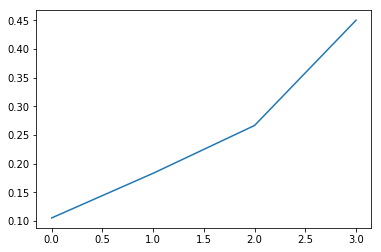

In [23]:
plt.plot(range(necoc),list_acc)
plt.show()

In [24]:
list_acc

[0.10555555555555556, 0.18333333333333332, 0.26666666666666666, 0.45]